In [62]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import matplotlib.pyplot as plt

# use h5py to read and write h5 file
import h5py

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [63]:
# grab post processing star data for a particular cycle, 34000 (try to rewrite, so use a copy of real data)
path_real = '/data/nugrid_apod2/data/set1ext/set1.2/see_wind/M2.00Z2.0e-02/M2.00Z0.020/'
path = '/user/ast501/dstephens/mppnp/Rewrite_D_TEST/Original_Files/'
star3_pp = mp.se(path_real)

Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


In [64]:
# rewrite and modify diffusion coefficients for the runs (33500 to 34000)
cycle_start = 33500
cycle_stop = 34000

# file string
file_string = path + 'M2.00Z0.020.0033001.se.h5'

# cycle strings
cycle_strings = []

# cycle template string
cycle_template = 'cycle{:>010d}'

# loop over all models, get the strings required
for i in range(1 + cycle_stop - cycle_start):
    cycle_strings.append(cycle_template.format(cycle_start + i))

These plots highlight the jumps in the diffusion coefficient which are strange and may affect results when modifying the diffusion coefficients

<IPython.core.display.Javascript object>


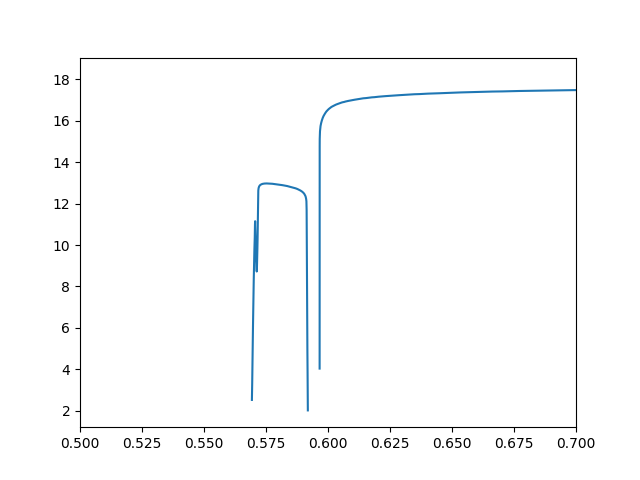

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


(0.5, 0.7)

In [65]:
# read in the data file
data_file = h5py.File(file_string,'r+')

# make a diffusion plot
offset=300
mass = data_file[cycle_strings[offset]]['SE_DATASET']['mass']
diffusion = data_file[cycle_strings[offset]]['SE_DATASET']['dcoeff']

# make a plot
plt.figure(1)

plt.plot(mass,np.log10(diffusion))

plt.xlim([0.5,0.7])

In [79]:
# look for pressure units
print data_file.attrs.values()
print data_file.attrs.keys()

[array(['1.8.3'],
       dtype='|S6'), array(['1.2'],
       dtype='|S4'), array([1409805936], dtype=int32), array([33001], dtype=int32), array(['lascar.phys.UVic.CA:/rpod2/fherwig/MESASep09/mesa6_i11:r3372'],
       dtype='|S61'), array(['M2.00Z0.020'],
       dtype='|S12'), array([ 2.]), array([ 0.02]), array([ 0.]), array([ 0.014]), array([ 1.]), array([ 31558149.984]), array([  1.98920000e+33]), array([ 1.]), array([ 1.]), array([ 1.]), array([ 1.])]

In [57]:
# what data do we have?
group = data_file[cycle_strings[offset]]['SE_DATASET']
temp_array = np.zeros(group.shape,group.dtype)
group.read_direct(temp_array)
temp_array

array([ (  1.90841486e+00,   9.54207432e-13,   2.34447353e+13,   1.82573200e-09,   2.92785530e+03, 1,   0.00000000e+00, [  6.82445659e-01,   2.92707806e-01,   5.19162280e-03,   1.02228829e-04,   2.70161966e-03,   1.04863477e-02],   3.29544584e+02,  -0.6211417 ,   2.34807329e-27),
       (  1.90841486e+00,   2.72508954e-12,   2.34447353e+13,   1.82573192e-09,   2.92785530e+03, 1,   1.72078833e+13, [  6.82445659e-01,   2.92707806e-01,   5.19162280e-03,   1.02228829e-04,   2.70161966e-03,   1.04863477e-02],   3.29544584e+02,  -0.64483902,   2.34807329e-27),
       (  1.90841486e+00,   1.10851654e-11,   2.34447353e+13,   1.82573462e-09,   2.92785530e+03, 1,   1.72078893e+13, [  6.82445659e-01,   2.92707806e-01,   5.19162280e-03,   1.02228829e-04,   2.70161966e-03,   1.04863477e-02],   3.29544584e+02,   0.10783439,   2.34807329e-27),
       ...,
       (  4.68693778e-07,   3.12483117e-07,   4.88034528e+06,   2.55305744e+06,   7.83394024e+07, 0,   0.00000000e+00, [  7.52836988e-34,   1.27647

 reading ['dcoeff']...100%

<IPython.core.display.Javascript object>


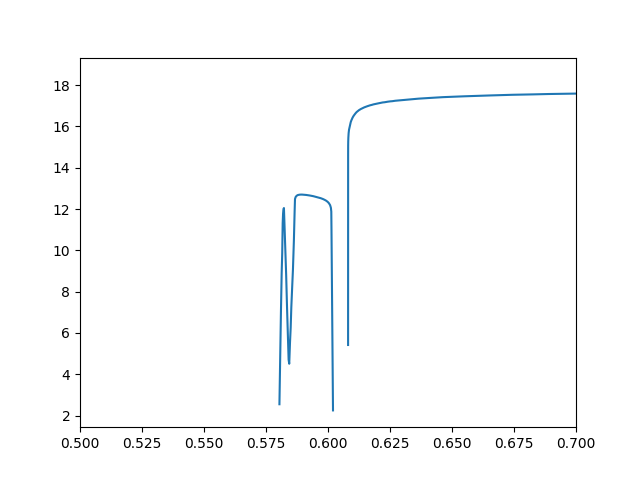

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


(0.5, 0.7)

In [41]:
# check the original data
# mass_orig = star3_pp.se.get(cycle_start+offset,'mass')
# diff_orig = star3_pp.se.get(cycle_start+offset,'dcoeff')

model = 44515
mass_orig = star3_pp.se.get(model,'mass')
diff_orig = star3_pp.se.get(model,'dcoeff')

# make plot
plt.figure(2)

plt.plot(mass_orig,np.log10(diff_orig))

plt.xlim([0.5,0.7])

In [46]:
# store first diffusion coefficient of every cycle to check after
sanity_check = [] 

# begin looping for modifying diffusion coefficient for each cycle
for i in range(len(cycle_strings)):
    
    # read in the data
    diffusion = data_file[cycle_strings[i]]['SE_DATASET']['dcoeff']

    # set counter for storing diffusion coefficient
    counter = 0 
    
    # modify the data
    for p in range(len(diffusion)):
        
        # make sure it is positive
        if diffusion[p] > 0:
            
            if counter == 0:
                
                # store coefficient AND its location in array
                sanity_check.append([p,diffusion[p]])
                
                # change counter
                counter += 1
                
            # decrease by a factor of 1e5
            diffusion[p] = diffusion[p] / 1e5
            
            # check to make sure value isn't too low
            if diffusion[p] < 1.:
                diffusion[p] = 0.0
    
    # change the original data
    data_file[cycle_strings[i]]['SE_DATASET']['dcoeff'] = diffusion
    
# close the file
data_file.close()

In [47]:
# re read the files in and check if diffusion coefficient has actually been changed
data_reread = h5py.File(path + 'M2.00Z0.020.0033001.se.h5','r')

# list to hold the changes (bool)
change = []

# begin looping
for i in range(len(cycle_strings)):
    
    # read in the data
    diffusion = data_reread[cycle_strings[i]]['SE_DATASET']['dcoeff']
    
    # do the sanity check
    index = sanity_check[i][0]
    
    if diffusion[index] != sanity_check[i][1]:
        change.append(1)
    else:
        change.append(0)

# close file
data_reread.close()

In [49]:
print diffusion[1]
print sanity_check[-1][1] / 1e5

1.72279288917e+13
1.72279288917e+13


In [ ]:
temp = data_file.get(cycle_strings[0] + '/SE_DATASET')
# temp2 = temp.get('SE_DATASET')

In [60]:
data_file.keys()[-2]

u'cycle0000034000'

In [ ]:
a = np.zeros(temp2.shape,temp2.dtype)
temp2.read_direct(a)

In [ ]:
a

In [ ]:
data_rewrite = h5py.File(path + 'M2.00Z0.020.0034001.se.h5','r+')

In [ ]:
mass = data_rewrite['cycle0000034001']['SE_DATASET']['mass']

In [ ]:
mass

In [ ]:
# change mass
mass[0] = 1.0

In [ ]:
# change data
data_rewrite['cycle0000034001']['SE_DATASET']['mass'] = mass

In [ ]:
# close
data_rewrite.close()

In [ ]:
# open again
data = h5py.File(path + 'M2.00Z0.020.0034001.se.h5','r')

In [ ]:
data['cycle0000034001']['SE_DATASET']['mass']

In [ ]:
temp = data.get('cycle0000034001')

In [ ]:
temp2 = temp.get('SE_DATASET')

In [ ]:
# read in data
mass_new = np.zeros(temp2.shape,temp2.dtype)
temp2.read_direct(mass_new)

In [ ]:
temp2.attrs.keys()

In [ ]:
# get the mass data
mass_new = data_rewrite['cycle0000034001']['SE_DATASET']['mass']

In [ ]:
mass = data['cycle0000034001']['SE_DATASET']['mass']

In [ ]:
# change one point in mass, save file and reload to see if different
mass[0] = 1.0

In [ ]:
# overwrite the data
data[...] = mass

In [ ]:
mass

In [ ]:
temp2 = data.get('A')

In [ ]:
temp2.value

In [ ]:
# attempt to read in data
tmp = data.get('cycle0000034001',None)

In [ ]:
tmp2 = tmp.get('SE_DATASET')

In [ ]:
a = tmp2.read_direct?

In [ ]:
temp_data = np.zeros(np.shape(tmp2),tmp2.dtype)

In [ ]:
tmp2.read_direct(temp_data)

In [ ]:
temp_data

In [ ]:
# check for the data at particular model numbers
star3_pp.se.get(34000,'yps')

In [ ]:
len(a)